<a href="https://www.kaggle.com/code/matjes/ais22-w04-descriptive-statistics-solutions?scriptVersionId=96560227" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

*Analytical Information Systems*

# Worksheet 4 - Descriptive Statistics

Matthias Griebel<br>
Lehrstuhl für Wirtschaftsinformatik und Business Analytics

SS 2022

***
# Table of Contents

* [1. Recap: Descriptive Statistics](#dstats)
    * [1.1. Scales of Measurement](#scales)
    * [1.2. Summary Descriptive Statistics](#sum)
* [2. Exercises](#exercises)
    * [2.1. Diamonds Dataset](#ddata)
    * [2.2. Exam Questions](#exam)    
*** 

## 1. Recap: Descriptive Statistics<a id="dstats"></a>

### 1.1. Scales of Measurement<a id="scales"></a>

Categorical (Qualitative) Data
- Nominal Scale: Identity or category
- Ordinal Scale: Order or rank

Quantitative Data (numeric)
- Interval Scale: Order and quantity: Differences can be calculated
- Ratio Scale: Interval scale with an absolute zeros
- Reshape messy data

### 1.2. Summary Descriptive Statistics<a id="sum"></a>

- __Central tendency:__ What are the most typical values?
    - mean, median, mode

- __Variability:__ How do the values vary?
    - Range
    - Percentiles
    - Standard Deviation
    - Coefficient of variation

- __Shape:__ Are the values symmetrically or asymmetrically distributed?
    - skewness: symmetry 
    - kurtosis: how peaky is the distribution

__Central tendency, variability, and shape__
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Comparison_mean_median_mode.svg/1280px-Comparison_mean_median_mode.svg.png" width="400">
from [Wikipedia](https://commons.wikimedia.org/wiki/File:Comparison_mean_median_mode.svg)

## 2. Exercises<a id="exercises"></a>

Firstly, we need to load the `tidyverse` package, and `psych` package the to analyze skewness and kurtosis.

In [1]:
library(tidyverse)
library(psych)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




### 2.1 The diamonds dataset<a id="ddata"></a>

The diamonds dataset comes with the package `ggplot2` and contains information about ~54,000 diamonds, including the `price`, `carat`, `color`, `clarity`, and `cut` of each diamond.Let's have a look at the data. What are the scales of the variables?

In [2]:
?diamonds

In [3]:
diamonds %>% head()

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


To get a better understanding of the `price` distribution, we can now calculate statistical measures to describe the central tendency, variability and the shape.

In [4]:
diamonds %>%
     summarise(Mean = mean(price),
               Sd = sd(price),
               Skew = psych::skew(price),
               Kurt = psych::kurtosi(price))

Mean,Sd,Skew,Kurt
<dbl>,<dbl>,<dbl>,<dbl>
3932.8,3989.44,1.618305,2.177191


Visualization often facilitates understanding of the data and its distribution.

*(We will learn more about data visualization in the next section.)*

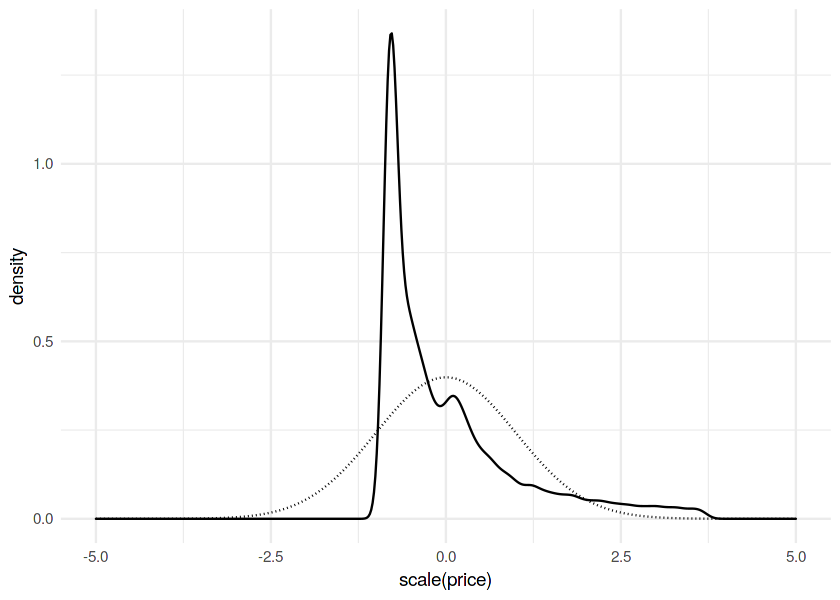

In [5]:
options(repr.plot.width=7, repr.plot.height=5)
diamonds %>% ggplot() + 
    geom_density(aes(x=scale(price))) +
    stat_function(n = 100, fun = dnorm, linetype='dotted') +
    theme_minimal() +
    xlim(-5,5)

We calculated statistical measures to get a grasp understanding of the diamond prices. Now, we want to get a deeper insight.

<span style="color:red">***Your turn:***</span>
__Describe the central tendency, variability and the shape of the prices depending on the quality (`cut`) and `color`.__

In [6]:
# Write your code here 
diamonds %>%
 group_by(cut, color) %>%
 summarise(mean(price), sd(price), psych::skew(price))

`summarise()` has grouped output by 'cut'. You can override using the `.groups` argument.



cut,color,mean(price),sd(price),psych::skew(price)
<ord>,<ord>,<dbl>,<dbl>,<dbl>
Fair,D,4291.061,3286.114,1.9026019
Fair,E,3682.312,2976.652,1.8762797
Fair,F,3827.003,3223.303,2.0351955
Fair,G,4239.255,3609.644,1.7964634
Fair,H,5135.683,3886.482,1.4589177
Fair,I,4685.446,3730.271,1.7301313
Fair,J,4975.655,4050.459,1.5352086
Good,D,3405.382,3175.149,2.0331595
Good,E,3423.644,3330.702,1.9105776


<span style="color:red">***Your turn:***</span>
**How many diamonds belong to each of the groups (cut and color combinations)? What is the cheapest and the most expensive price within each group?**

In [7]:
# Write your code here
diamonds %>%
 group_by(cut, color) %>%
 summarise(n(), max(price), min(price))

`summarise()` has grouped output by 'cut'. You can override using the `.groups` argument.



cut,color,n(),max(price),min(price)
<ord>,<ord>,<int>,<int>,<int>
Fair,D,163,16386,536
Fair,E,224,15584,337
Fair,F,312,17995,496
Fair,G,314,18574,369
Fair,H,303,18565,659
Fair,I,175,18242,735
Fair,J,119,18531,416
Good,D,662,18468,361
Good,E,933,18236,327


Let's take a closer look at the other variables in the data set.

<span style="color:red">***Your turn:***</span>
__What is the average volume of the diamonds, depending on the qualtity (`cut`)?__

In [8]:
# Write your code here
diamonds %>%
     mutate(Volume = x*y*z) %>%
     group_by(cut) %>%
     summarise(mean(Volume))

cut,mean(Volume)
<ord>,<dbl>
Fair,164.9505
Good,136.2573
Very Good,130.9997
Premium,145.0521
Ideal,115.3949


__What are the average values of all (numeric) columns?__

In [9]:
# Write your code here
diamonds %>%
     summarise_if(is.numeric, mean)

carat,depth,table,price,x,y,z
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.7979397,61.7494,57.45718,3932.8,5.731157,5.734526,3.538734


### 2.2. Exam Questions<a id="exam"></a>


From the exam WS 2018/19, Data Engineering & Integration:

__Consider the following data set:__

In [10]:
# This code was not included in the exam, values may differ
library(tidyverse)
set.seed(5)
ggplot2::diamonds %>% 
    sample_n(10) %>% 
    arrange(cut) -> data

data

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.43,Good,F,SI1,63.6,53,948,4.83,4.79,3.06
0.71,Good,I,VS2,64.0,59,1840,5.61,5.55,3.57
0.56,Very Good,H,VVS2,59.8,57,1723,5.39,5.48,3.25
1.13,Very Good,I,SI2,59.9,57,4195,6.76,6.80,4.06
1.46,Premium,H,SI2,61.4,59,7604,7.30,7.26,4.47
1.29,Premium,J,VS1,61.7,59,5463,6.93,6.97,4.29
1.09,Premium,H,VS1,60.2,61,5951,6.70,6.66,4.02
0.53,Ideal,F,VS1,61.7,56,1630,5.20,5.22,3.21
0.70,Ideal,G,VS2,61.8,54,2593,5.71,5.74,3.54


__i. (1 points) You are executing the code below. How many rows does the resulting data frame contain? Briefly explain your answer.__

```R
data  %>%
    group_by(cut) %>%
    summarize(median(depth))
```

In [11]:
data %>%
     group_by(cut) %>%
     summarize(median(depth))
# 4 rows (distinct 'cuts')

cut,median(depth)
<ord>,<dbl>
Good,63.80
Very Good,59.85
Premium,61.40
Ideal,61.80


__ii. (2 points) You are executing the code below. What are the column names of the resulting data frame?__

```R
data %>%
    group_by(clarity , color) %>%
    filter(price > 1000) %>%
    mutate(volume = x * y * z) %>%
    summarise(x = mean(carat),y = mean(price)) %>%
    mutate(z = x * y)
```


In [12]:
# Write your answer/code here
data %>%
     group_by(clarity , color) %>%
     summarise(x = mean(carat),y = mean(price)) %>%
     mutate(z = x * y) %>%
     colnames()

`summarise()` has grouped output by 'clarity'. You can override using the `.groups` argument.



[1] "clarity" "color"   "x"       "y"       "z"

__iii. (2 points) Explain in pseudo code (e.g., dplyr pipelines) how to obtain the following transformed table from the given data set.__

<table style="font-size: 100%;">
<thead>
	<tr><th scope=col>color</th><th scope=col>max_price</th><th scope=col>min_price</th></tr>
</thead>
<tbody>
	<tr><td>F</td><td>1630</td><td> 786</td></tr>
	<tr><td>G</td><td>2593</td><td>2593</td></tr>
	<tr><td>H</td><td>7604</td><td>1723</td></tr>
	<tr><td>I</td><td>4195</td><td>1840</td></tr>
	<tr><td>J</td><td>5463</td><td>5463</td></tr>
</tbody>
</table>

In [13]:
# Write your answer/code here
data %>%
     group_by(color) %>%
     summarise(max_price = max(price),
     min_price = min(price))
     # optional: arrange(color)

color,max_price,min_price
<ord>,<int>,<int>
F,1630,786
G,2593,2593
H,7604,1723
I,4195,1840
J,5463,5463
